In [ ]:
#system("source activate sf_test")

In [ ]:
#install.packages('ggplot2')
#install.packages("dplyr")

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#find the .BED files of Roadmap enhancers intersected with hg19 files containing species counts
path <- "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/roadmap_multi_data/human_specific"
setwd(path)

In [3]:
a <- list.files()

In [4]:
print(a)

 [1] "chr1_hspec_x_hg19.bed"  "chr10_hspec_x_hg19.bed" "chr11_hspec_x_hg19.bed"
 [4] "chr12_hspec_x_hg19.bed" "chr13_hspec_x_hg19.bed" "chr14_hspec_x_hg19.bed"
 [7] "chr15_hspec_x_hg19.bed" "chr16_hspec_x_hg19.bed" "chr17_hspec_x_hg19.bed"
[10] "chr18_hspec_x_hg19.bed" "chr19_hspec_x_hg19.bed" "chr2_hspec_x_hg19.bed" 
[13] "chr20_hspec_x_hg19.bed" "chr21_hspec_x_hg19.bed" "chr22_hspec_x_hg19.bed"
[16] "chr3_hspec_x_hg19.bed"  "chr4_hspec_x_hg19.bed"  "chr5_hspec_x_hg19.bed" 
[19] "chr6_hspec_x_hg19.bed"  "chr7_hspec_x_hg19.bed"  "chr8_hspec_x_hg19.bed" 
[22] "chr9_hspec_x_hg19.bed"  "chrX_hspec_x_hg19.bed"  "result_pdf"            


In [5]:
bedfile = a[1]
print(bedfile)
df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F, nrows=20000)
dim(df)

[1] "chr1_hspec_x_hg19.bed"


[1] 20000    13

In [ ]:
getwd()

In [6]:
# format the table

# rename columns
names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap", "hg19_chr", "hg19_start", "hg19_end", "hg19_strand", "hg19_ref", "hg19_46spec", "hg19_8vspec", "hg19-46spec_names", "length")

# convert species count columns from characters to integers 
df$hg19_46spec <- as.integer(df$hg19_46spec)
df$hg19_8vspec <- as.integer(df$hg19_8vspec)

# calculate the length of fragment overlap in log10
df$log10_length = log(df$length, 10)
head(df)

# create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
df2 = subset(df, df$length >0)

#make a subset of the counts
df_count <-plyr::count(df2, vars = c( "hg19_46spec","enh_overlap"))

head(df2)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

enh_chr,enh_start,enh_end,enh_overlap,hg19_chr,hg19_start,hg19_end,hg19_strand,hg19_ref,hg19_46spec,hg19_8vspec,hg19-46spec_names,length,log10_length
chr1,9998,10016,1,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr1,10016,10024,2,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr1,10024,10032,3,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr1,10032,10079,4,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr1,10079,10086,5,.,-1,-1,.,.,NA,NA,.,0,-Inf
chr1,10086,10102,6,.,-1,-1,.,.,NA,NA,.,0,-Inf


,enh_chr,enh_start,enh_end,enh_overlap,hg19_chr,hg19_start,hg19_end,hg19_strand,hg19_ref,hg19_46spec,hg19_8vspec,hg19-46spec_names,length,log10_length
14,chr1,13045,14765,1,chr1,12997,13066,+,hg19,11,3,"[loxAfr3, bosTau4, canFam2, equCab2, rheMac2, ponAbe2, panTro2, tetNig2, fr2, gasAcu1, danRer6]",21,1.322219
15,chr1,13045,14765,1,chr1,13065,13257,+,hg19,10,3,"[loxAfr3, bosTau4, canFam2, equCab2, rheMac2, ponAbe2, panTro2, tetNig2, fr2, gasAcu1]",192,2.283301
16,chr1,13045,14765,1,chr1,13256,13380,+,hg19,11,3,"[loxAfr3, bosTau4, canFam2, equCab2, rheMac2, ponAbe2, panTro2, tetNig2, fr2, gasAcu1, oryLat2]",124,2.093422
17,chr1,13045,14765,1,chr1,13379,13569,+,hg19,7,3,"[loxAfr3, bosTau4, canFam2, equCab2, rheMac2, ponAbe2, panTro2]",190,2.278754
18,chr1,13045,14765,1,chr1,13568,13597,+,hg19,8,3,"[panTro2, ponAbe2, rheMac2, equCab2, canFam2, bosTau4, loxAfr3, macEug1]",29,1.462398
19,chr1,13045,14765,1,chr1,13596,13829,+,hg19,7,3,"[loxAfr3, bosTau4, canFam2, equCab2, rheMac2, ponAbe2, panTro2]",233,2.367356


In [27]:
# how many Roadmap enhancers do not overlap any sequencing block in Multiz46-way?

noverlap = subset(df, df$length==0)
length(noverlap)

hspecific = subset(df2, df2$hg19_46spec ==0)
few=subset(df2, hg19_46spec<5)

[1] 14

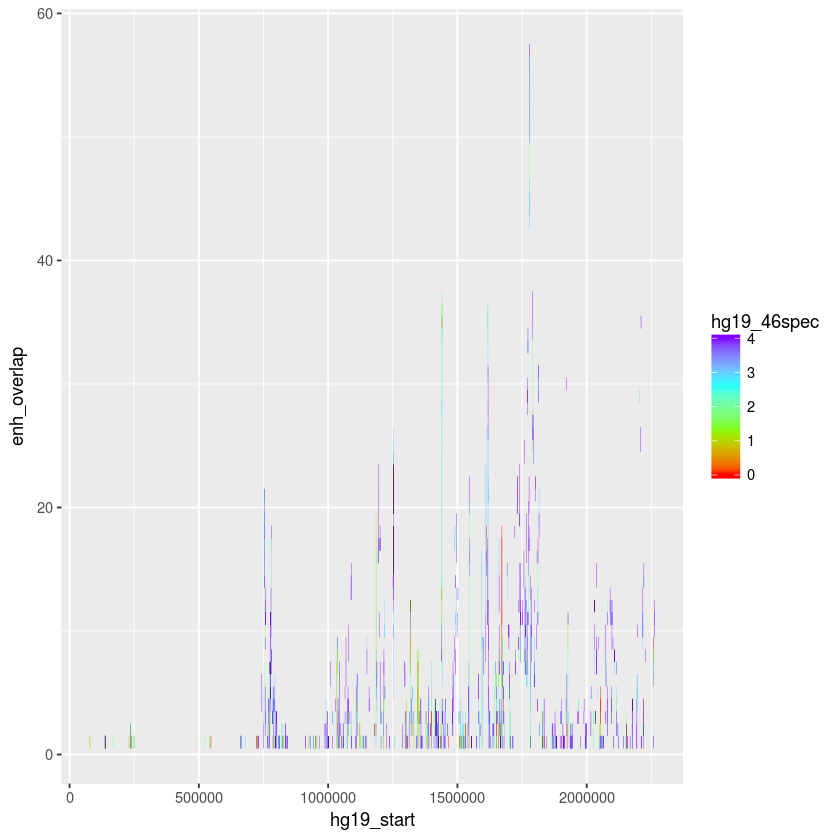

In [76]:
ggplot(data=few, aes(x= hg19_start, y = enh_overlap,width = length, color= hg19_46spec))+ 
geom_tile()+
scale_color_gradientn(colours = rainbow(4))

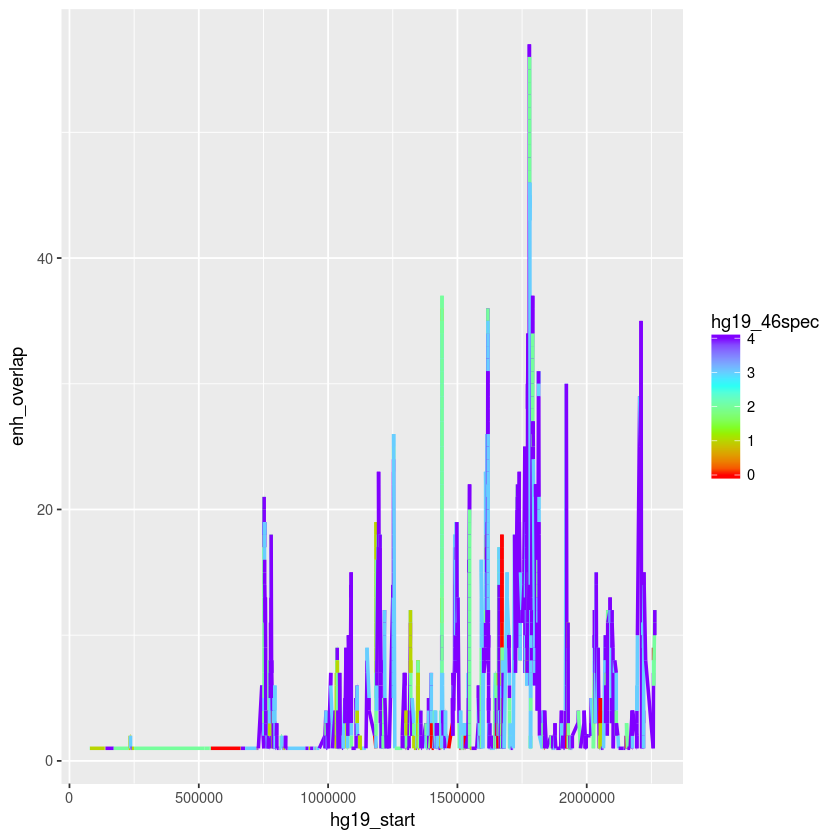

In [73]:
ggplot(data=few, aes(y = enh_overlap, x = hg19_start, color=hg19_46spec))+ 
geom_line(size =1)+
scale_color_gradientn(colours = rainbow(4))+
scale_x_continuous()

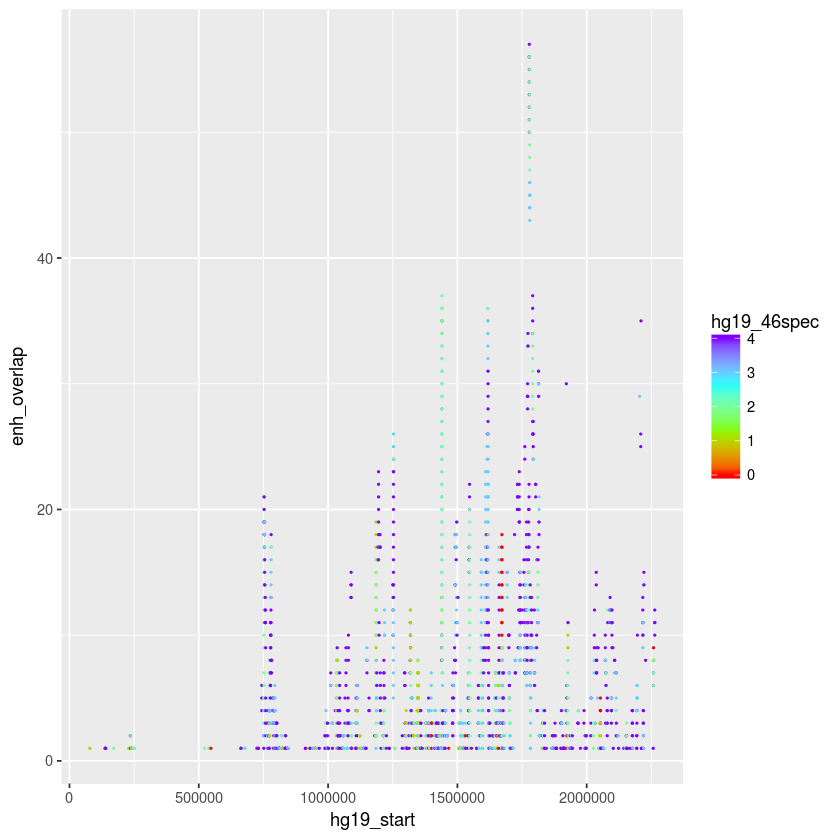

In [72]:
ggplot(data=few, aes(x = hg19_start, y = enh_overlap, xend = hg19_end, yend = enh_overlap, color = hg19_46spec))+ 
geom_segment(size = 1)+

geom_point(size =0.25)+
scale_color_gradientn(colours = rainbow(4))


In [ ]:
df_count <-plyr::count(df2, vars = c( "hg19_46spec","enh_overlap"))
head(df_count)

In [ ]:
graph_stuff <-function(bedfile){
    # make dataframe of the bedfile
    df <-read.table(bedfile, sep = '\t', h=F, stringsAsFactors=F)
    
    chr= unlist(strsplit(bedfile, "_"))[1]
    print(chr)
    ## format the table

    # rename columns
    names(df) = c("enh_chr", "enh_start", "enh_end", "enh_overlap", "hg19_chr", "hg19_start", "hg19_end", "hg19_strand", "hg19_ref", "hg19_46spec", "hg19_8vspec", "hg19-46spec_names", "length")

    # convert species count columns from characters to integers 
    df$hg19_46spec <- as.integer(df$hg19_46spec)
    df$hg19_8vspec <- as.integer(df$hg19_8vspec)

    # calculate the length of fragment overlap in log10
    df$log10_length = log(df$length, 10)
    
    # create a subset of the dataframe to remove non-overlapping roadmap fragments in hg19 MSA
    df2 = subset(df, df$length >0)

    #make a subset of the counts
    df_count <-plyr::count(df2, vars = c( "hg19_46spec","enh_overlap"))
    
    ggplot(df_count, aes(y = enh_overlap, x =hg19_46spec)) + 
        geom_tile(aes(fill = freq), color = "white")+
        scale_fill_gradient(low = "steelblue",high = "white")+
        ggtitle(paste0("Hg19 Species Alignments x Roadmap Enhancer Sample-Overlap - ", chr))
    ggsave(paste0(chr,"_heatmap.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
    
    ggplot(df2, aes(hg19_46spec)) + 
        geom_histogram(bins = 46) +
        ggtitle(paste0("overlap of hg19 species in roadmap enhancers (multi-intersected) - ", chr)) 
    ggsave(paste0(chr,"_histogram.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 7, height = 5, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 
    
    ggplot(df2, aes(y = hg19_46spec, x = enh_overlap, color=log10_length)) + 
        geom_point() +
        scale_fill_gradient(low = "steelblue", high = "white")
    ggsave(paste0(chr,"_dot.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
    
    #tile plot
    ggplot(data=few, aes(x= hg19_start, y = enh_overlap,width = length, color= hg19_46spec))+ 
    geom_tile()+
    scale_color_gradientn(colours = rainbow(4))   
    ggsave(paste0(chr,"_tile.pdf"), path = paste0(path,"/result_pdf/"), device = "pdf", width = 8, height = 8, units = "in", dpi=300)
    
    ggplot(data=few, aes(x = hg19_start, y = enh_overlap, xend = hg19_end, yend = enh_overlap, color = hg19_46spec))+ 
    geom_segment(size = 1)+
    
    geom_point(size =0.25)+
    scale_color_gradientn(colours = rainbow(4))
}



In [ ]:
for (bedfile in a){
        graph_stuff(bedfile)
    }

In [ ]:
# the frequency of species-specific enhancers x the number of samples enhancers are found in
ggplot(df_count, aes(y = enh_overlap, x =hg19_46spec)) + 
geom_tile(aes(fill = freq), color = "white")+
scale_fill_gradient(low = "steelblue",high = "white")+
ggtitle("Hg19 Species Alignments x Roadmap Enhancer Sample-Overlap - Chr18")

ggsave("chr18_heatmap.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)

In [ ]:
ggplot(df2, aes(hg19_46spec)) + 
geom_histogram(bins = 46) +
ggtitle("overlap of hg19 species in roadmap enhancers (multi-intersected)") 
ggsave("chr18_histogram.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)
# relatedness of species/ misrepresentation of species diversity in dataset might skew our interpretation of this graph 

In [ ]:
summary(df)

In [ ]:
lapply(df2, class)
str(df2)

In [ ]:
ggplot(df2, aes(y = hg19_46spec, x = enh_overlap, color=log10_length)) + 
geom_point() +
scale_fill_gradient(low = "steelblue", high = "white")+
ggsave("chr18_dot.pdf", path = paste0(path,"/result_pdf/"), device = "pdf", width = 4, height = 4, units = "in", dpi=300)